# COS711 Assignment 2
#### Lukas Anthonissen u21434345

## Important Settings for the Marker

In [1]:
import random

run_hyperparameter_optimization = True # Set to True to run the hyperparameter optimization or False to load the results from the CSV files. Note: running the hyperparameter optimization will take a long time.
run_optimizers = True # Set to True to run the optimizer comparison or False to load the results from the CSV files. Note: running the optimizer comparison will take a long time.
seed = 42

## Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.use_deterministic_algorithms(True)

2024-10-04 10:28:18.660085: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-04 10:28:18.660474: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-04 10:28:18.662288: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-04 10:28:18.667675: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-04 10:28:18.677570: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

## Import Data

In [3]:
directory = "data"
almonds = pd.read_csv(f'{directory}/Almond.csv')

almonds.describe()

,Unnamed: 0,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area)
count,2803.000000,1946.000000,1861.000000,1799.000000,2803.000000,2803.000000,1946.000000,2803.000000,2803.000000,1004.000000,1004.000000,2803.000000,2803.000000
mean,1401.000000,290.609274,171.025915,109.705378,26511.117374,743.863770,0.470466,0.955828,1.825233,1.753216,0.813114,0.724587,27696.218159
std,809.300727,62.719433,29.916529,18.940597,13782.561344,230.632076,0.118673,0.039596,0.794058,0.206616,0.041312,0.047474,14237.347610
min,0.000000,151.335266,88.050529,59.494278,6037.000000,311.563489,0.173748,0.718772,1.164469,1.400082,0.699897,0.454538,6355.000000
25%,700.500000,245.966293,149.453659,97.091682,16211.500000,571.730009,0.384810,0.944579,1.357398,1.612490,0.784476,0.701673,17088.500000
50%,1401.000000,279.879883,170.168365,110.280136,23440.500000,707.487369,0.472718,0.970422,1.576412,1.705716,0.810120,0.733720,24589.000000
75%,2101.500000,330.508575,190.640427,121.392773,33451.000000,878.896530,0.577553,0.981484,1.965953,1.833339,0.838141,0.757551,34863.250000
max,2802.000000,515.352478,258.569794,181.845200,89282.000000,1864.947387,0.697293,0.992889,9.660057,2.731251,0.930563,0.845813,90642.500000


## Data Analysis

First we will analyze the data to find any inconsistencies or patterns that may be present in the data.

### Type Distribution

Here, we will investigate the distribution of the different types of almonds in the dataset to determine if there is a class imbalance.

/tmp/ipykernel_1973743/96229088.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Type', data=almonds, palette='viridis')
/tmp/ipykernel_1973743/96229088.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f'{class_percentages[i]:.2f}%',


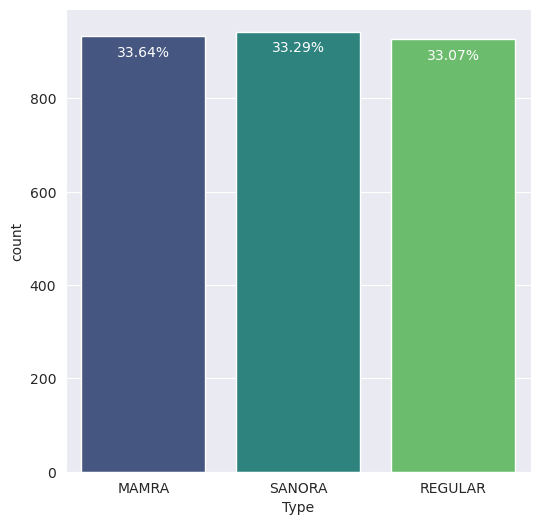

In [4]:
f, ax = plt.subplots(figsize=(6, 6))

sns.despine(f)
sns.countplot(x='Type', data=almonds, palette='viridis')

# Count occurrences of each class
class_counts = almonds['Type'].value_counts()

# Calculate percentages
total_count = class_counts.sum()
class_percentages = class_counts / total_count * 100

for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height - 20,
            f'{class_percentages[i]:.2f}%',
            color='white',
            va='top',
            ha='center')

### Null Values

Here, we will investigate the percentage of null values in each column to determine if any columns should be dropped due to a high percentage of null values or if the null values should be imputed.

/tmp/ipykernel_1973743/2464153978.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=null_percentages.index, y=null_percentages, palette='viridis')
/tmp/ipykernel_1973743/2464153978.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f'{null_percentages[i]:.2f}%',


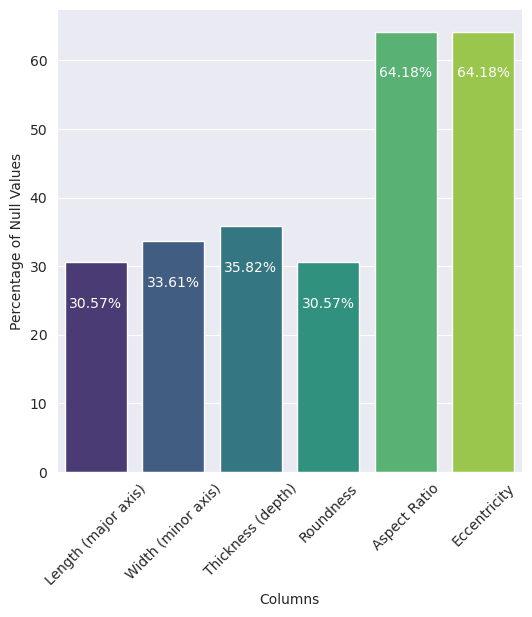

In [5]:
null_percentages = almonds.isnull().mean() * 100
null_percentages = null_percentages[null_percentages > 0]

f, ax = plt.subplots(figsize=(6, 6))

sns.despine(f)
sns.barplot(x=null_percentages.index, y=null_percentages, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel("Columns")
plt.ylabel("Percentage of Null Values")
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height - 5,
            f'{null_percentages[i]:.2f}%',
            color='white',
            va='top',
            ha='center')

## Data Processing

### Processing and analysis before splitting

Here we will process the data before splitting it into training and testing sets.

#### One Hot Encoding

In [6]:
# Encode output field "Type"
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(almonds[['Type']])
encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Type']))
almonds = pd.concat([almonds, encoded], axis=1)

# Drop original field
almonds = almonds.drop(columns=['Type'])

#### Drop Columns with more than 50% null values

Any columns with more than 50% null values will be dropped due to the high percentage of missing data that could skew the results.

In [7]:
null_percentages = almonds.isnull().mean() * 100
columns_to_drop = null_percentages[null_percentages > 50].index
almonds = almonds.drop(columns=columns_to_drop)

### Splitting

Here we will split the data into training and testing sets to allow the model to be evaluated on unseen data.

The split will be 80% training and 20% testing.

We will use a random state of 42 to ensure reproducibility.

In [8]:
x = almonds.iloc[:, :-3]
y = almonds.iloc[:, -3:]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

almonds.describe()

x_train = pd.DataFrame(x_train, columns=almonds.columns[:-3])
x_test = pd.DataFrame(x_test, columns=almonds.columns[:-3])
y_train = pd.DataFrame(y_train, columns=almonds.columns[-3:])
y_test = pd.DataFrame(y_test, columns=almonds.columns[-3:])

### Processing after splitting

Here we will process the data after splitting it into training and testing sets to ensure that the data is standardized and imputed from the training set only.

This is to prevent data leakage from the testing set into the training set to reproduce real-world scenarios where the model is trained on historical data and tested on unseen data.

#### Impute Missing Values

Here we will impute missing values in the data using the mean of the column.

In [9]:
# Replace null values with mean

imputer = SimpleImputer(strategy='mean')
numeric_cols = x_train.select_dtypes(include=['int64', 'float64']).columns
x_train[numeric_cols] = imputer.fit_transform(x_train[numeric_cols])
x_test[numeric_cols] = imputer.transform(x_test[numeric_cols])

#### Standardize Data

We will standardize the data to ensure that the data is centered around 0 with a standard deviation of 1.

In [10]:
scaler = StandardScaler()
x_train[numeric_cols] = scaler.fit_transform(x_train[numeric_cols])
x_test[numeric_cols] = scaler.transform(x_test[numeric_cols])

### Convert Data to PyTorch DataSet

This is a necessary technical step to convert the data into a format that PyTorch can use to train the model.

In [11]:
from torch.utils.data import Dataset

X_train = torch.tensor(x_train.to_numpy(), dtype=torch.float32)
y_train = torch.tensor(y_train.to_numpy(), dtype=torch.float32)
X_test = torch.tensor(x_test.to_numpy(), dtype=torch.float32)
y_test = torch.tensor(y_test.to_numpy(), dtype=torch.float32)

class CustomDataset(Dataset):
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data

    def __len__(self):
        return len(self.X_data)

    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]

train_dataset = CustomDataset(X_train, y_train)
test_dataset = CustomDataset(X_test, y_test)

train_loader = DataLoader(dataset=train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=1, shuffle=False)

## The Neural Network Model

Here we will define the neural network class that will be used to classify the data.

In [12]:
from typing import Optional

import torch
from torch import nn
from torch.utils.data import DataLoader


class NeuralNetwork(nn.Module):
    def __init__(self, sequential_layers: nn.Sequential):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()

        self.linear_stack = sequential_layers

    def forward(self, x):
        logits = self.linear_stack(x)
        return logits

    @staticmethod
    def _accuracy(outputs, target):
        max_value = torch.max(outputs).item()
        outputs = torch.where(torch.tensor(outputs == max_value), torch.tensor([1]), torch.tensor([0]))

        if False not in torch.eq(outputs, target):
            return 1
        return 0

    def fit(
            self,
            training_loader: DataLoader,
            epochs: int,
            loss_fn,
            optimizer,
            validation_set: Optional[DataLoader] = None,
            verbose: int = 2
    ):
        history = {
            "epoch": [],
            "train_loss": [],
            "val_loss": []
        }

        for epoch in range(1, epochs + 1):
            self.train()
            if verbose > 0:
                print(f"-------------------------------\n"
                      f"Epoch {epoch}\n"
                      f"-------------------------------")

            training_loss: float = 0.0

            for batch, tensor in enumerate(training_loader):
                data, target = tensor

                optimizer.zero_grad()
                outputs = self(data)
                loss = loss_fn(outputs, target)
                loss.backward()
                optimizer.step()
                training_loss += loss.item()

            if verbose > 1:
                print(f"Loss: {training_loss / len(training_loader)}")
            history["epoch"].append(epoch)
            history["train_loss"].append(training_loss / len(training_loader))

            if validation_set is not None:
                val_loss = 0
                correct = 0
                self.eval()
                with torch.no_grad():
                    for data, target in validation_set:
                        outputs = self(data)
                        val_loss += loss_fn(outputs, target).item()

                        correct += self._accuracy(outputs, target)

                    if verbose > 0:
                        print(f"Accuracy: {correct / len(validation_set)}")
                    val_loss /= len(validation_set)
                    history["val_loss"].append(val_loss)

        return history

    def evaluate(
            self,
            test_loader: DataLoader,
            loss_fn,
            verbose: int = 1
    ):
        test_loss = 0
        correct = 0

        self.eval()

        with torch.no_grad():
            for data, target in test_loader:
                outputs = self(data)
                test_loss += loss_fn(outputs, target).item()
                correct += self._accuracy(outputs, target)

        test_loss /= len(test_loader)
        accuracy = correct / len(test_loader)

        if verbose > 0:
            print(f"Test Error: \n Accuracy: {(100 * accuracy):>0.1f}%, Avg loss: {test_loss:>8f} \n")
        return accuracy, test_loss

## Hybrid Optimizer

Here we will define a custom optimizer that averages the gradients of multiple optimizers to improve the performance of the model.

In [13]:
import torch
from torch.optim import Optimizer


class AveragedOptimizer(Optimizer):
    def __init__(self, optimizers):
        # optimizers: list of optimizers (e.g., Adam, SGD)
        self.optimizers = optimizers

        # Ensure that all optimizers are optimizing the same parameters
        param_groups = optimizers[0].param_groups

        # Initialize parent class with param_groups
        super(AveragedOptimizer, self).__init__(param_groups, {})

    def zero_grad(self, set_to_none: bool = True):
        # Call zero_grad() for each optimizer to clear gradients
        for optimizer in self.optimizers:
            optimizer.zero_grad()

    def step(self, closure=None):
        # Store parameter updates from each optimizer
        updates = []

        # Perform the step for each optimizer (this updates their internal states)
        for optimizer in self.optimizers:
            optimizer.step(closure=closure)
            # Capture the parameter updates after each optimizer's step
            param_updates = []
            for group in optimizer.param_groups:
                for param in group['params']:
                    if param.grad is None:
                        continue
                    # Append the parameter's data after the optimizer's step
                    param_updates.append(param.data.clone())
            updates.append(param_updates)

        # Now average the parameter updates and apply them to the shared model parameters
        with torch.no_grad():
            for i, group in enumerate(self.param_groups):
                for j, param in enumerate(group['params']):
                    if param.grad is None:
                        continue

                    # Compute the average update across all optimizers
                    avg_update = torch.zeros_like(param.data)
                    for update in updates:
                        avg_update += update[j] - param.data

                    # Apply the average update
                    avg_update /= len(self.optimizers)
                    param.data.add_(avg_update)



## Hyperparameter Optimization

We will now optimise the size of the hidden layer and the dropout rate to determine the best hyperparameters for the model.

The base hyperparameters are as follows:
- Activation Function: ReLU
- Number of Hidden Layers: 1
- Optimizer: Adam
- Learning Rate: 0.001
- Epochs: 100
- Batch Size: 8
- Loss Function: Cross Entropy Loss

The hyperparameters that will be optimized are:
- **Hidden Layer Size** in the range [16, 32, 64, 128, 256, 512]
- **Dropout Rate** in the range [0, 0.1, 0.2, 0.3, 0.4, 0.5]


Here we define a method to build a model from the hyperparameters, train the model and return the history and testing accuracy of the model.

In [14]:
from collections import OrderedDict

def build_and_run_model(
        hidden_layer_size: int = 128,
        learning_rate: float = 0.001,
        dropout: float = 0.1,
        verbose: int = 0,
        activation: str = 'relu',
        num_layers: int = 1,
        optimizer: str = 'adam'
):
    if activation == 'relu':
        activation = nn.ReLU()
    elif activation == 'tanh':
        activation = nn.Tanh()
    elif activation == 'sigmoid':
        activation = nn.Sigmoid()
    elif activation == 'leaky_relu':
        activation = nn.LeakyReLU()
    else:
        activation = nn.ReLU()

    layers = OrderedDict([
        ('input', nn.Linear(11, hidden_layer_size)),
        ('activation', activation),
        ('dropout', nn.Dropout(dropout)),
    ])

    for i in range(num_layers - 1):
        layers[f'hidden_{i}'] = nn.Linear(hidden_layer_size, hidden_layer_size)
        layers[f'activation_{i}'] = activation
        layers[f'dropout_{i}'] = nn.Dropout(dropout)

    layers['output'] = nn.Linear(hidden_layer_size, 3)

    # Initialize the model
    model = NeuralNetwork(
        nn.Sequential(
            layers
        )
    )

    if optimizer == 'adam':
        optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    elif optimizer == 'sgd':
        optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    elif optimizer == 'rprop':
        optimizer = torch.optim.Rprop(model.parameters(), lr=learning_rate)
    elif optimizer == 'hybrid':
        optimizer = AveragedOptimizer(
            [
                torch.optim.Adam(model.parameters(), lr=learning_rate),
                torch.optim.SGD(model.parameters(), lr=learning_rate),
                torch.optim.Rprop(model.parameters(), lr=learning_rate)
            ]
        )
    else:
        optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    optimizer.zero_grad()
    loss_fn = nn.CrossEntropyLoss()

    history = model.fit(
        training_loader=train_loader,
        validation_set=test_loader,
        optimizer=optimizer,
        loss_fn=loss_fn,
        epochs=100,
        verbose=verbose
    )

    accuracy, loss = model.evaluate(
        test_loader,
        loss_fn,
        verbose=verbose
    )

    return history, accuracy

Here we will run the hyperparameter optimization for the hidden layer size and dropout rate.

In [15]:
if run_hyperparameter_optimization:
    size_range = [32, 64, 128, 256]
    dropout_range = [0, 0.1, 0.2, 0.3]
    
    hyperparameter_optimisation_accuracies = []
    for size in size_range:
        for dropout in dropout_range:
            local_losses = []
            local_accuracies = []
            total_runs = 20
            for _ in range(total_runs):
                history, accuracy = build_and_run_model(hidden_layer_size=size, dropout=dropout)
                local_losses.append(history['val_loss'][-1])
                local_accuracies.append(accuracy)
                
            avg_accuracy = np.average(local_accuracies)
            std_accuracy = np.std(local_accuracies)
            avg_loss = np.average(local_losses)
            std_loss = np.std(local_losses)

            hyperparameter_optimisation_accuracies.append({
                'size': size,
                'dropout': dropout,
                'accuracy': avg_accuracy,
                'std_accuracy': std_accuracy,
            })
            
            print(f"Size: {size}, Dropout Rate: {dropout}, Accuracy: {avg_accuracy}")

    hyperparameter_optimisation_accuracies = pd.DataFrame(hyperparameter_optimisation_accuracies, columns=['size', 'dropout', 'accuracy', 'std_accuracy'])
else:
    hyperparameter_optimisation_accuracies = pd.read_csv('accuracies_size_dropout.csv')


/tmp/ipykernel_1973743/3207387759.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = torch.where(torch.tensor(outputs == max_value), torch.tensor([1]), torch.tensor([0]))


Size: 32, Dropout Rate: 0, Accuracy: 0.9840463458110517
Size: 32, Dropout Rate: 0.1, Accuracy: 0.9742424242424242
Size: 32, Dropout Rate: 0.2, Accuracy: 0.9682709447415331
Size: 32, Dropout Rate: 0.3, Accuracy: 0.9614081996434937
Size: 64, Dropout Rate: 0, Accuracy: 0.9852941176470587
Size: 64, Dropout Rate: 0.1, Accuracy: 0.982620320855615
Size: 64, Dropout Rate: 0.2, Accuracy: 0.9823529411764707
Size: 64, Dropout Rate: 0.3, Accuracy: 0.9764705882352942
Size: 128, Dropout Rate: 0, Accuracy: 0.9868092691622102
Size: 128, Dropout Rate: 0.1, Accuracy: 0.9881461675579322
Size: 128, Dropout Rate: 0.2, Accuracy: 0.9890374331550801
Size: 128, Dropout Rate: 0.3, Accuracy: 0.9868092691622105
Size: 256, Dropout Rate: 0, Accuracy: 0.9872549019607841
Size: 256, Dropout Rate: 0.1, Accuracy: 0.990374331550802
Size: 256, Dropout Rate: 0.2, Accuracy: 0.9893048128342246
Size: 256, Dropout Rate: 0.3, Accuracy: 0.989572192513369


Here we will plot the results of the hyperparameter optimization in a heatmap to determine the best hyperparameters.

<Axes: xlabel='dropout', ylabel='size'>

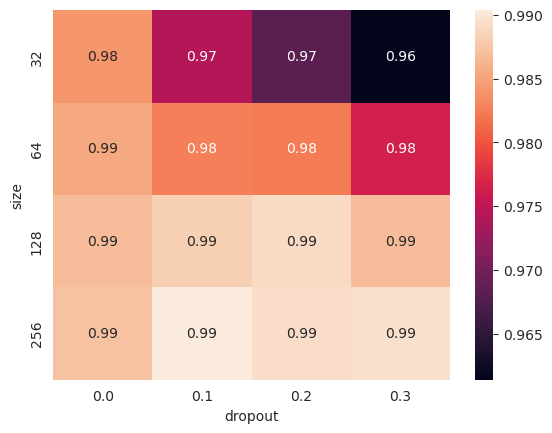

In [16]:
pivotted_hyperparameter_optimisation_accuracies = hyperparameter_optimisation_accuracies.pivot(
    index='size',
    columns='dropout',
    values='accuracy'
)

sns.heatmap(pivotted_hyperparameter_optimisation_accuracies, annot=True)

## Optimizer Comparison

Here we will compare the performance of different optimizers on the dataset to determine which optimizer performs the best.

The optimizers that will be compared are:
- Adam
- SGD
- Rprop
- Hybrid (Averaged Optimizer)

The hyperparameters that will be used are:
- Hidden Layer Size: 128
- Dropout Rate: 0.1
- Activation Function: ReLU
- Number of Hidden Layers: 1
- Learning Rate: 0.001
- Epochs: 100
- Batch Size: 8
- Loss Function: Cross Entropy Loss
- Optimizer: Optimizer to be compared


In [17]:
if run_optimizers:
    optimizers = ['adam', 'sgd', 'rprop', 'hybrid']
    
    optimiser_comparison_accuracies = []
    for optimizer in optimizers:
        local_losses = []
        local_accuracies = []
        total_runs = 40
        for _ in range(total_runs):
            history, accuracy = build_and_run_model(
                hidden_layer_size=128,
                dropout=0.1,
                optimizer=optimizer
            )
            local_losses.append(history['val_loss'][-1])
            local_accuracies.append(accuracy)
    
        avg_accuracy = np.average(local_accuracies)
        std_accuracy = np.std(local_accuracies)
        avg_loss = np.average(local_losses)
        std_loss = np.std(local_losses)

        optimiser_comparison_accuracies.append({
            'optimizer': optimizer,
            'accuracy': avg_accuracy,
            'std_accuracy': std_accuracy,
        })
    
        print(f"Optimizer: {optimizer}, Accuracy: {avg_accuracy}, Std: {std_accuracy}")

    optimiser_comparison_accuracies = pd.DataFrame(optimiser_comparison_accuracies, columns=['optimizer', 'accuracy', 'std_accuracy'])
else:
    optimiser_comparison_accuracies = pd.read_csv('accuracies_optimizers.csv')

/tmp/ipykernel_1973743/3207387759.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = torch.where(torch.tensor(outputs == max_value), torch.tensor([1]), torch.tensor([0]))


Optimizer: adam, Accuracy: 0.988680926916221, Std: 0.003956857910948869
Optimizer: sgd, Accuracy: 0.8442513368983956, Std: 0.010414372715852613
Optimizer: rprop, Accuracy: 0.7448752228163993, Std: 0.023049815343575815
Optimizer: hybrid, Accuracy: 0.9882798573975045, Std: 0.0037999179548508575


Here we will plot the results of the optimizer comparison in a histogram to determine the best optimizer.

/tmp/ipykernel_1973743/123775812.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='optimizer', y='accuracy', data=optimiser_comparison_accuracies, palette='viridis')


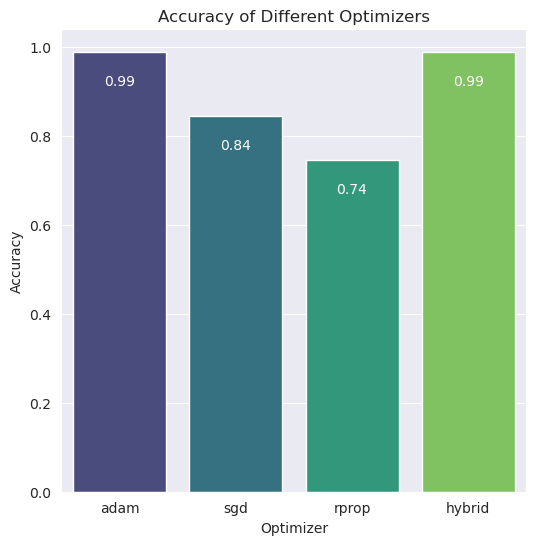

In [18]:
# Plot the results in a histogram

f, ax = plt.subplots(figsize=(6, 6))

sns.despine(f)
sns.barplot(x='optimizer', y='accuracy', data=optimiser_comparison_accuracies, palette='viridis')

for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height - 0.05,
            f'{optimiser_comparison_accuracies["accuracy"][i]:.2f}',
            color='white',
            va='top',
            ha='center')
    
plt.xlabel("Optimizer")
plt.ylabel("Accuracy")
plt.title("Accuracy of Different Optimizers")
plt.show()